## Make a prediction on CO-tip images from folder


In [2]:
import numpy as np
import glob
import os
from PIL import Image
from keras import backend as K
from keras.models import load_model
from utils import *


# model parameters
crop_size      = 16  # pixels size of images to feed in input of CNN
model_dir      = './pretrained_weights/' 

K.set_image_dim_ordering('th')
if K.image_data_format() == 'channels_first':
    input_shape = (1,crop_size, crop_size)
else:
    input_shape = (crop_size, crop_size,1)

### load data to predict

In [15]:
#load data to predict
path_to_data  = './databaseNew6/test2/bads'   # <======= path to folder with CO images
path_to_preds = './'  # output prediction will be plotted here to predicted.png 
dataX = []
file_names = []
images = sorted(glob.glob(path_to_data+'/'+'*.png'))
for image_path in images:
    _, file_name = os.path.split(image_path)
    image = np.array((Image.open(image_path).resize((crop_size,crop_size), Image.ANTIALIAS))).astype(np.float32)
    dataX.append(np.flipud(image))
    file_names.append(file_name)
dataX = np.expand_dims(np.array(dataX), axis = 1)
print (f'dataX: {dataX.shape}')

dataX: (36, 1, 16, 16)


In [16]:
model_path = model_dir + 'model.h5'

# Load model
model = load_model(model_path)
print(f'\nModel loaded from {model_path}')
# summarize model.
model.summary()


Model loaded from ./pretrained_weights/model.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 4, 14, 14)         40        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 4, 14, 14)         0         
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 4, 14, 14)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 12, 12)         148       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 4, 12, 12)         0         
_________________________________________________________________
spatial_dropout2d_2 (Spatial (None, 4, 12, 12)         0         
_________________________________________________________________
average_pooling2d_1 (Averag

In [17]:
add_norm_CO(dataX)

outputs = model.predict_on_batch(dataX)
probs = np.squeeze(np.array(outputs))
preds = np.squeeze(np.round(outputs))

In [23]:
def plot_preds_with_title(dataX,probs,file_names, cmap=cm.gray):
    cols = 10
    rows = -(-len(file_names) // cols)
    fig = plt.figure(figsize=(3.0*cols,3.0*rows))
    
    for i in range(len(file_names)):
        sp = fig.add_subplot(rows,cols,i+1)#, origin="lower"
        sp.imshow(dataX[i,0,:,:], cmap = cmap)   
        sp.axis('Off')
        sp.set_title(f'pred = {probs[i]: 0.3f}\n{file_names[i]}') 
    
    save_name = 'predicted.png'
    plt.savefig('./'+save_name, bbox_inches='tight', dpi=200)
    plt.show()
    plt.close()

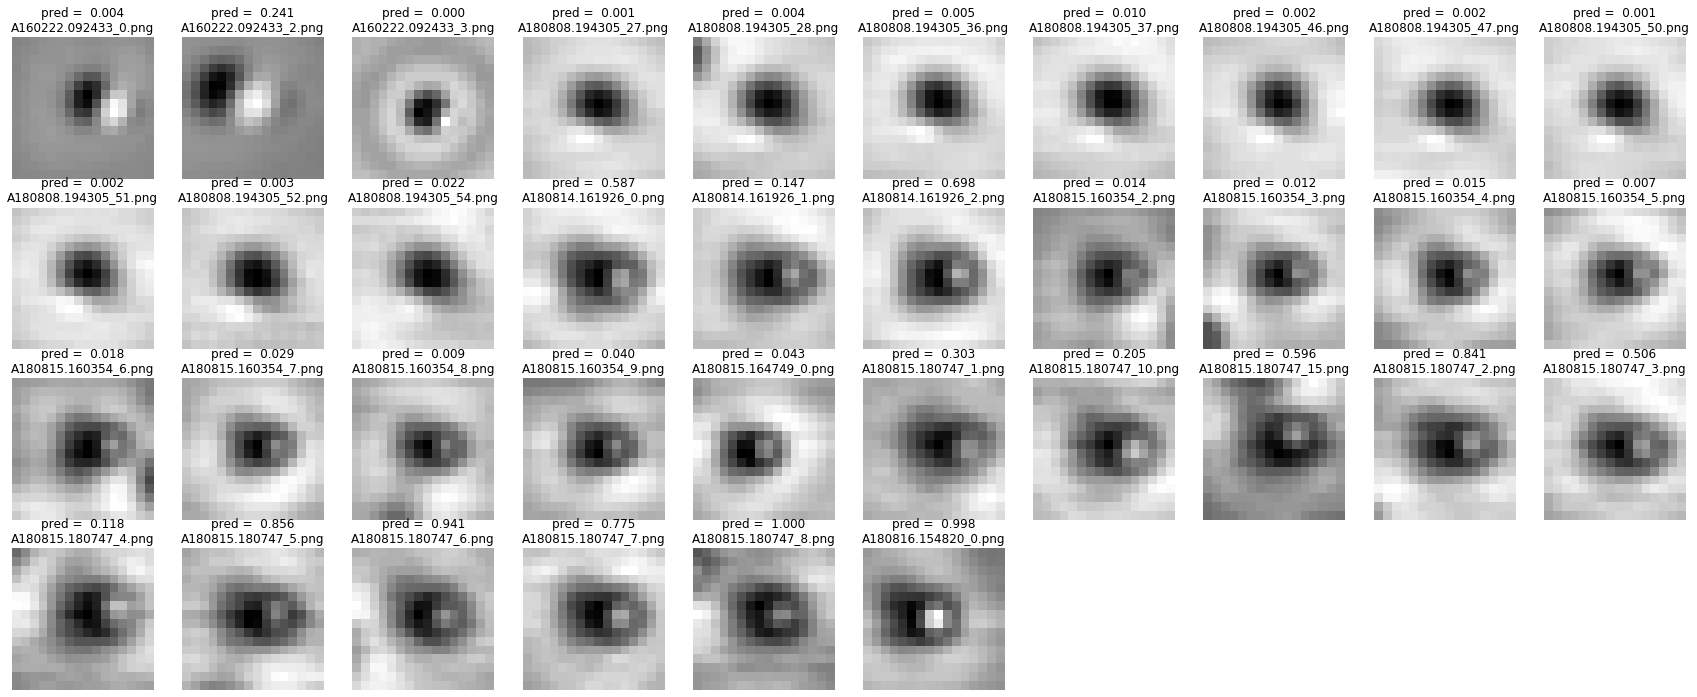

In [24]:
# plot prediction results to image
plot_preds_with_title(dataX,probs,file_names)
